In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px


ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/shared/homeworks/python_ds_miniprojects/6/ads_data.csv', sep=',')

ads_clients_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv', sep=',')

In [2]:
ads_data

date                 time  event platform   ad_id  \
0       2019-04-01  2019-04-01 00:00:48   view  android   45061   
1       2019-04-01  2019-04-01 00:00:48   view      web  121288   
2       2019-04-01  2019-04-01 00:01:03   view  android  102737   
3       2019-04-01  2019-04-01 00:01:03   view  android  107564   
4       2019-04-01  2019-04-01 00:01:09   view  android    4922   
...            ...                  ...    ...      ...     ...   
999995  2019-04-05  2019-04-05 20:59:52   view      web  112583   
999996  2019-04-05  2019-04-05 20:59:52   view  android  112583   
999997  2019-04-05  2019-04-05 20:59:52  click      web  112583   
999998  2019-04-05  2019-04-05 20:59:52   view      web  113350   
999999  2019-04-05  2019-04-05 20:59:52   view  android  117353   

        client_union_id  campaign_union_id ad_cost_type  ad_cost  has_video  \
0                 34734              45061          CPM    200.6          0   
1                121288             121288          CPM    187.4          0   
2                102535             102564          CPC     60.7          0   
3                106914             107564          CPM    217.3          0   
4                    37               4400          CPC     60.1          0   
...                 ...                ...          ...      ...        ...   
999995           111818             112260          CPM    210.1          0   
999996           111818             112260          CPM    210.1          0   
999997           111818             112260          CPM    210.1          0   
999998           113036             113251          CPM    183.3          0   
999999           117350             117353          CPM    207.5          1   

        target_audience_count  
0                     1955269  
1                      232011  
2                        4410  
3                       62711  
4                     1183501  
...                       ...  
999995                  22392  
999996                  22392  
999997                  22392  
999998                 571929  
999999                 167598  

[1000000 rows x 11 columns]

In [3]:
ads_clients_data

date  client_union_id  community_id create_date
0       2020-05-07                1    -130371893  2018-12-24
1       2020-05-07                2    -130304626  2019-02-10
2       2020-05-07                3    -130462599  2019-01-25
3       2020-05-07                4    -130574300  2018-12-09
4       2020-05-07                5    -130292358  2019-01-08
...            ...              ...           ...         ...
122073  2020-05-07           122074    -130470790  2018-12-21
122074  2020-05-07           122075    -130911261  2018-11-09
122075  2020-05-07           122076    -130494912  2018-10-27
122076  2020-05-07           122077    -130910585  2018-12-05
122077  2020-05-07           122078    -130558729  2019-01-22

[122078 rows x 4 columns]

In [4]:
# task 2

task2 = ads_data.groupby(['ad_id','event']).size().reset_index().rename(columns={0:'events_amount'})

task2

ad_id  event  events_amount
0          2  click              1
1          2   view            101
2          3  click              3
3          3   view            184
4       1902  click              1
...      ...    ...            ...
1476  122013   view            156
1477  122023   view             68
1478  122031  click              1
1479  122031   view            138
1480  122078   view             42

[1481 rows x 3 columns]

In [5]:
task2_pivot = task2.pivot(index='ad_id', columns='event', values='events_amount')

task2_pivot

event   click   view
ad_id               
2         1.0  101.0
3         3.0  184.0
1902      1.0   41.0
2064      NaN   35.0
2132      1.0   58.0
...       ...    ...
122004    4.0  100.0
122013    NaN  156.0
122023    NaN   68.0
122031    1.0  138.0
122078    NaN   42.0

[965 rows x 2 columns]

In [6]:
task2_pivot = task2_pivot.fillna(0)

task2_pivot

event   click   view
ad_id               
2         1.0  101.0
3         3.0  184.0
1902      1.0   41.0
2064      0.0   35.0
2132      1.0   58.0
...       ...    ...
122004    4.0  100.0
122013    0.0  156.0
122023    0.0   68.0
122031    1.0  138.0
122078    0.0   42.0

[965 rows x 2 columns]

In [7]:
task2_pivot.click.mean().round(0)

113.0

In [8]:
task2_pivot.view.mean().round(0)

923.0

In [9]:
# task 3

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )


In [10]:
task3 = task2.query("event == 'view'")

task3

ad_id event  events_amount
1          2  view            101
3          3  view            184
5       1902  view             41
6       2064  view             35
8       2132  view             58
...      ...   ...            ...
1475  122004  view            100
1476  122013  view            156
1477  122023  view             68
1479  122031  view            138
1480  122078  view             42

[956 rows x 3 columns]

In [11]:
task3['events_amount'] = np.log(task3.events_amount)

task3

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ad_id event  events_amount
1          2  view       4.615121
3          3  view       5.214936
5       1902  view       3.713572
6       2064  view       3.555348
8       2132  view       4.060443
...      ...   ...            ...
1475  122004  view       4.605170
1476  122013  view       5.049856
1477  122023  view       4.219508
1479  122031  view       4.927254
1480  122078  view       3.737670

[956 rows x 3 columns]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


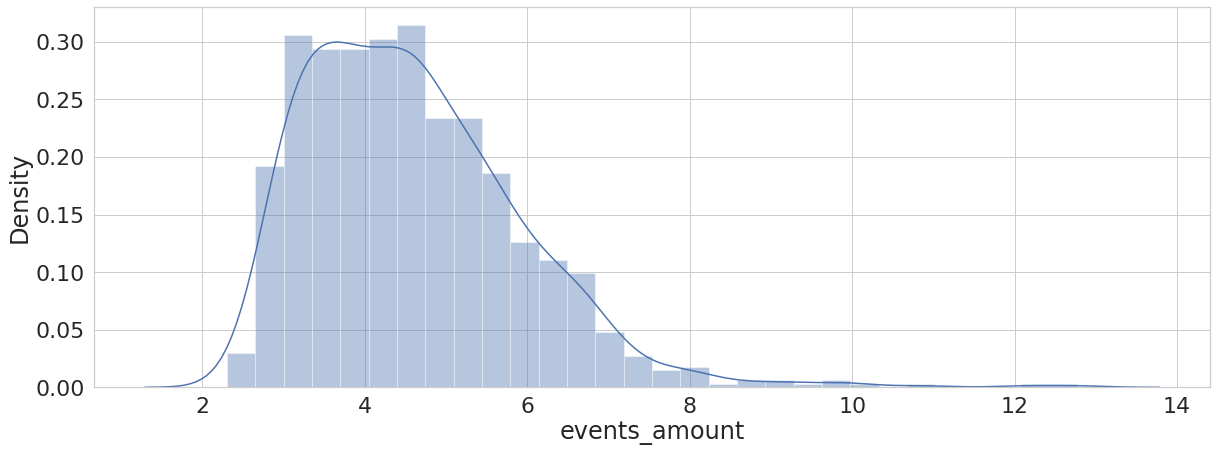

In [12]:
sns.distplot(task3.events_amount)

In [13]:
# task 4

task4 = ads_data.query("event == 'view'")

task4

date                 time event platform   ad_id  \
0       2019-04-01  2019-04-01 00:00:48  view  android   45061   
1       2019-04-01  2019-04-01 00:00:48  view      web  121288   
2       2019-04-01  2019-04-01 00:01:03  view  android  102737   
3       2019-04-01  2019-04-01 00:01:03  view  android  107564   
4       2019-04-01  2019-04-01 00:01:09  view  android    4922   
...            ...                  ...   ...      ...     ...   
999993  2019-04-05  2019-04-05 20:59:52  view      ios  112583   
999995  2019-04-05  2019-04-05 20:59:52  view      web  112583   
999996  2019-04-05  2019-04-05 20:59:52  view  android  112583   
999998  2019-04-05  2019-04-05 20:59:52  view      web  113350   
999999  2019-04-05  2019-04-05 20:59:52  view  android  117353   

        client_union_id  campaign_union_id ad_cost_type  ad_cost  has_video  \
0                 34734              45061          CPM    200.6          0   
1                121288             121288          CPM    187.4          0   
2                102535             102564          CPC     60.7          0   
3                106914             107564          CPM    217.3          0   
4                    37               4400          CPC     60.1          0   
...                 ...                ...          ...      ...        ...   
999993           111818             112260          CPM    210.1          0   
999995           111818             112260          CPM    210.1          0   
999996           111818             112260          CPM    210.1          0   
999998           113036             113251          CPM    183.3          0   
999999           117350             117353          CPM    207.5          1   

        target_audience_count  
0                     1955269  
1                      232011  
2                        4410  
3                       62711  
4                     1183501  
...                       ...  
999993                  22392  
999995                  22392  
999996                  22392  
999998                 571929  
999999                 167598  

[890822 rows x 11 columns]

In [14]:
#task4 = task4.groupby(['ad_id','date']).size().reset_index().rename(columns={0:'views_amount'})
#task4 = task4.groupby(['date']).size().reset_index()\
#.rename(columns={0:'views_amount'})
#task4
#task4.sort_values('date')
#task4.views_amount.rolling(2).mean()
#task4.rolling(2).mean()

task4_pivot = task4.pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')

task4_pivot

date    2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  2019-04-06
ad_id                                                                         
2             83.0        18.0         NaN         NaN         NaN         NaN
3            158.0        26.0         NaN         NaN         NaN         NaN
1902           NaN         NaN        34.0         7.0         NaN         NaN
2064           NaN        28.0         7.0         NaN         NaN         NaN
2132           NaN         NaN        25.0        27.0         6.0         NaN
...            ...         ...         ...         ...         ...         ...
122004        85.0        15.0         NaN         NaN         NaN         NaN
122013         NaN         NaN         NaN       134.0        22.0         NaN
122023         NaN         NaN         NaN        53.0        15.0         NaN
122031         NaN         NaN         NaN         NaN       119.0        19.0
122078         NaN         NaN        36.0         6.0         NaN         NaN

[956 rows x 6 columns]

In [15]:
# task4 = task4.groupby(['date']).size().reset_index().rename(columns={0:'views_amount'})

task4_pivot = task4_pivot.mean()

task4_pivot

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [16]:


task4_pivot_rolling = task4_pivot.rolling(window=2).mean().round(0)

task4_pivot_rolling

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [17]:
# task4.index = task4.date
# task4

task4_pivot_rolling['2019-04-06']

598.0

In [18]:
# task 5

abs(task4_pivot - task4_pivot_rolling)


date
2019-04-01           NaN
2019-04-02      8.213018
2019-04-03     12.952778
2019-04-04    255.901720
2019-04-05    121.109677
2019-04-06    320.877273
dtype: float64

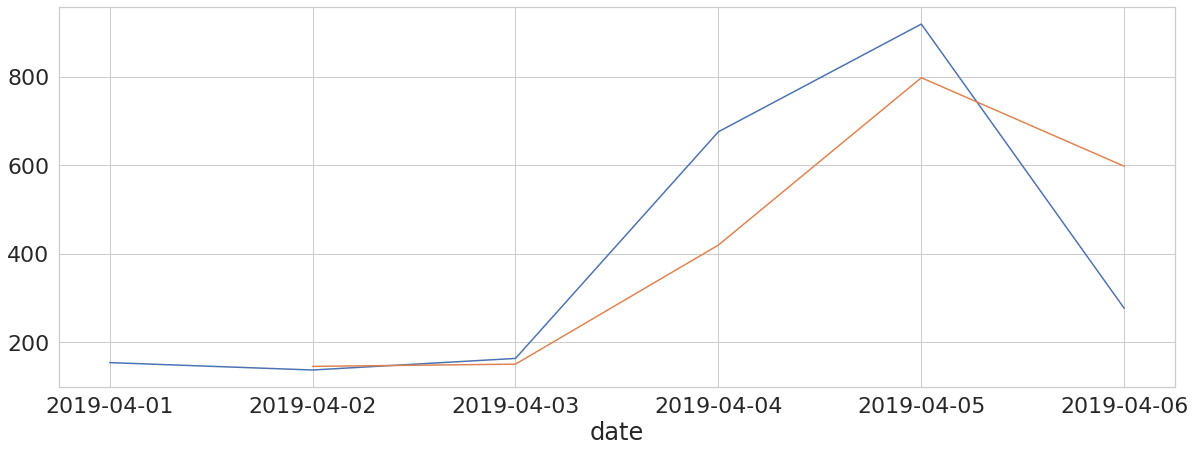

In [19]:
sns.lineplot(data=task4_pivot)
sns.lineplot(data=task4_pivot_rolling)

In [20]:
# task 6

ads_data


date                 time  event platform   ad_id  \
0       2019-04-01  2019-04-01 00:00:48   view  android   45061   
1       2019-04-01  2019-04-01 00:00:48   view      web  121288   
2       2019-04-01  2019-04-01 00:01:03   view  android  102737   
3       2019-04-01  2019-04-01 00:01:03   view  android  107564   
4       2019-04-01  2019-04-01 00:01:09   view  android    4922   
...            ...                  ...    ...      ...     ...   
999995  2019-04-05  2019-04-05 20:59:52   view      web  112583   
999996  2019-04-05  2019-04-05 20:59:52   view  android  112583   
999997  2019-04-05  2019-04-05 20:59:52  click      web  112583   
999998  2019-04-05  2019-04-05 20:59:52   view      web  113350   
999999  2019-04-05  2019-04-05 20:59:52   view  android  117353   

        client_union_id  campaign_union_id ad_cost_type  ad_cost  has_video  \
0                 34734              45061          CPM    200.6          0   
1                121288             121288          CPM    187.4          0   
2                102535             102564          CPC     60.7          0   
3                106914             107564          CPM    217.3          0   
4                    37               4400          CPC     60.1          0   
...                 ...                ...          ...      ...        ...   
999995           111818             112260          CPM    210.1          0   
999996           111818             112260          CPM    210.1          0   
999997           111818             112260          CPM    210.1          0   
999998           113036             113251          CPM    183.3          0   
999999           117350             117353          CPM    207.5          1   

        target_audience_count  
0                     1955269  
1                      232011  
2                        4410  
3                       62711  
4                     1183501  
...                       ...  
999995                  22392  
999996                  22392  
999997                  22392  
999998                 571929  
999999                 167598  

[1000000 rows x 11 columns]

In [21]:
ads_clients_data

date  client_union_id  community_id create_date
0       2020-05-07                1    -130371893  2018-12-24
1       2020-05-07                2    -130304626  2019-02-10
2       2020-05-07                3    -130462599  2019-01-25
3       2020-05-07                4    -130574300  2018-12-09
4       2020-05-07                5    -130292358  2019-01-08
...            ...              ...           ...         ...
122073  2020-05-07           122074    -130470790  2018-12-21
122074  2020-05-07           122075    -130911261  2018-11-09
122075  2020-05-07           122076    -130494912  2018-10-27
122076  2020-05-07           122077    -130910585  2018-12-05
122077  2020-05-07           122078    -130558729  2019-01-22

[122078 rows x 4 columns]

In [22]:
task6 = ads_data.merge(ads_clients_data, how='inner', on='client_union_id')

task6

date_x                 time event platform  ad_id  \
0       2019-04-01  2019-04-01 00:00:48  view  android  45061   
1       2019-04-01  2019-04-01 00:03:28  view  android  45061   
2       2019-04-01  2019-04-01 00:04:58  view      ios  45061   
3       2019-04-01  2019-04-01 00:10:23  view      ios  45061   
4       2019-04-01  2019-04-01 00:15:42  view  android  45061   
...            ...                  ...   ...      ...    ...   
999995  2019-04-04  2019-04-04 18:07:25  view      web  43921   
999996  2019-04-04  2019-04-04 18:29:06  view      ios  43921   
999997  2019-04-04  2019-04-04 18:55:46  view      web  43921   
999998  2019-04-04  2019-04-04 19:21:09  view  android  43921   
999999  2019-04-04  2019-04-04 20:22:57  view      ios  43921   

        client_union_id  campaign_union_id ad_cost_type  ad_cost  has_video  \
0                 34734              45061          CPM    200.6          0   
1                 34734              45061          CPM    200.6          0   
2                 34734              45061          CPM    200.6          0   
3                 34734              45061          CPM    200.6          0   
4                 34734              45061          CPM    200.6          0   
...                 ...                ...          ...      ...        ...   
999995            30712              43920          CPM    196.7          0   
999996            30712              43920          CPM    196.7          0   
999997            30712              43920          CPM    196.7          0   
999998            30712              43920          CPM    196.7          0   
999999            30712              43920          CPM    196.7          0   

        target_audience_count      date_y  community_id create_date  
0                     1955269  2020-05-07    -130129582  2018-12-04  
1                     1955269  2020-05-07    -130129582  2018-12-04  
2                     1955269  2020-05-07    -130129582  2018-12-04  
3                     1955269  2020-05-07    -130129582  2018-12-04  
4                     1955269  2020-05-07    -130129582  2018-12-04  
...                       ...         ...           ...         ...  
999995                   7807  2020-05-07    -130652663  2019-03-04  
999996                   7807  2020-05-07    -130652663  2019-03-04  
999997                   7807  2020-05-07    -130652663  2019-03-04  
999998                   7807  2020-05-07    -130652663  2019-03-04  
999999                   7807  2020-05-07    -130652663  2019-03-04  

[1000000 rows x 14 columns]

In [23]:

task6['date_x'] = pd.to_datetime(task6['date_x'])
task6['time'] = pd.to_datetime(task6['time'])
task6['date_y'] = pd.to_datetime(task6['date_y'])
task6['create_date'] = pd.to_datetime(task6['create_date'])

In [24]:
task6

date_x                time event platform  ad_id  client_union_id  \
0      2019-04-01 2019-04-01 00:00:48  view  android  45061            34734   
1      2019-04-01 2019-04-01 00:03:28  view  android  45061            34734   
2      2019-04-01 2019-04-01 00:04:58  view      ios  45061            34734   
3      2019-04-01 2019-04-01 00:10:23  view      ios  45061            34734   
4      2019-04-01 2019-04-01 00:15:42  view  android  45061            34734   
...           ...                 ...   ...      ...    ...              ...   
999995 2019-04-04 2019-04-04 18:07:25  view      web  43921            30712   
999996 2019-04-04 2019-04-04 18:29:06  view      ios  43921            30712   
999997 2019-04-04 2019-04-04 18:55:46  view      web  43921            30712   
999998 2019-04-04 2019-04-04 19:21:09  view  android  43921            30712   
999999 2019-04-04 2019-04-04 20:22:57  view      ios  43921            30712   

        campaign_union_id ad_cost_type  ad_cost  has_video  \
0                   45061          CPM    200.6          0   
1                   45061          CPM    200.6          0   
2                   45061          CPM    200.6          0   
3                   45061          CPM    200.6          0   
4                   45061          CPM    200.6          0   
...                   ...          ...      ...        ...   
999995              43920          CPM    196.7          0   
999996              43920          CPM    196.7          0   
999997              43920          CPM    196.7          0   
999998              43920          CPM    196.7          0   
999999              43920          CPM    196.7          0   

        target_audience_count     date_y  community_id create_date  
0                     1955269 2020-05-07    -130129582  2018-12-04  
1                     1955269 2020-05-07    -130129582  2018-12-04  
2                     1955269 2020-05-07    -130129582  2018-12-04  
3                     1955269 2020-05-07    -130129582  2018-12-04  
4                     1955269 2020-05-07    -130129582  2018-12-04  
...                       ...        ...           ...         ...  
999995                   7807 2020-05-07    -130652663  2019-03-04  
999996                   7807 2020-05-07    -130652663  2019-03-04  
999997                   7807 2020-05-07    -130652663  2019-03-04  
999998                   7807 2020-05-07    -130652663  2019-03-04  
999999                   7807 2020-05-07    -130652663  2019-03-04  

[1000000 rows x 14 columns]

In [25]:
# task6['time_diff_days'] = task6['create_date'] - task6['date_x']
task6['time_diff_days'] = (task6['create_date'] - task6['date_x']).dt.days * (-1)

task6.sort_values('time_diff_days') 

date_x                time event platform   ad_id  client_union_id  \
9326   2019-04-01 2019-04-01 14:51:01  view  android  108707           108678   
9365   2019-04-01 2019-04-01 16:26:53  view      web  108707           108678   
9364   2019-04-01 2019-04-01 16:19:09  view      ios  108688           108678   
9363   2019-04-01 2019-04-01 16:18:57  view  android  108688           108678   
9362   2019-04-01 2019-04-01 16:12:32  view      ios  108688           108678   
...           ...                 ...   ...      ...     ...              ...   
948117 2019-04-06 2019-04-05 22:45:40  view      web   38748            23628   
948118 2019-04-06 2019-04-05 22:59:17  view      ios   38748            23628   
948112 2019-04-06 2019-04-05 21:01:20  view  android   38748            23628   
948114 2019-04-06 2019-04-05 21:29:45  view      web   38748            23628   
948116 2019-04-06 2019-04-05 22:13:16  view  android   38748            23628   

        campaign_union_id ad_cost_type  ad_cost  has_video  \
9326               108690          CPC     51.7          0   
9365               108690          CPC     51.7          0   
9364               108678          CPC     51.1          0   
9363               108678          CPC     51.1          0   
9362               108678          CPC     51.1          0   
...                   ...          ...      ...        ...   
948117              38747          CPM    203.4          0   
948118              38747          CPM    203.4          0   
948112              38747          CPM    203.4          0   
948114              38747          CPM    203.4          0   
948116              38747          CPM    203.4          0   

        target_audience_count     date_y  community_id create_date  \
9326                   108133 2020-05-07    -130114786  2019-03-06   
9365                   108133 2020-05-07    -130114786  2019-03-06   
9364                   253723 2020-05-07    -130114786  2019-03-06   
9363                   253723 2020-05-07    -130114786  2019-03-06   
9362                   253723 2020-05-07    -130114786  2019-03-06   
...                       ...        ...           ...         ...   
948117                 429812 2020-05-07    -130007523  2018-07-28   
948118                 429812 2020-05-07    -130007523  2018-07-28   
948112                 429812 2020-05-07    -130007523  2018-07-28   
948114                 429812 2020-05-07    -130007523  2018-07-28   
948116                 429812 2020-05-07    -130007523  2018-07-28   

        time_diff_days  
9326                26  
9365                26  
9364                26  
9363                26  
9362                26  
...                ...  
948117             252  
948118             252  
948112             252  
948114             252  
948116             252  

[1000000 rows x 15 columns]

In [26]:
task6.groupby(['client_union_id']).agg({'time_diff_days':'max'}).mean().round(0)

time_diff_days    126.0
dtype: float64

In [27]:
# task 7
client_count = task6.client_union_id.nunique() 
client_count



838

In [28]:
task6.dtypes

date_x                   datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
date_y                   datetime64[ns]
community_id                      int64
create_date              datetime64[ns]
time_diff_days                    int64
dtype: object

In [29]:
task6.loc[task6['time_diff_days'] <= 365]

date_x                time event platform  ad_id  client_union_id  \
0      2019-04-01 2019-04-01 00:00:48  view  android  45061            34734   
1      2019-04-01 2019-04-01 00:03:28  view  android  45061            34734   
2      2019-04-01 2019-04-01 00:04:58  view      ios  45061            34734   
3      2019-04-01 2019-04-01 00:10:23  view      ios  45061            34734   
4      2019-04-01 2019-04-01 00:15:42  view  android  45061            34734   
...           ...                 ...   ...      ...    ...              ...   
999995 2019-04-04 2019-04-04 18:07:25  view      web  43921            30712   
999996 2019-04-04 2019-04-04 18:29:06  view      ios  43921            30712   
999997 2019-04-04 2019-04-04 18:55:46  view      web  43921            30712   
999998 2019-04-04 2019-04-04 19:21:09  view  android  43921            30712   
999999 2019-04-04 2019-04-04 20:22:57  view      ios  43921            30712   

        campaign_union_id ad_cost_type  ad_cost  has_video  \
0                   45061          CPM    200.6          0   
1                   45061          CPM    200.6          0   
2                   45061          CPM    200.6          0   
3                   45061          CPM    200.6          0   
4                   45061          CPM    200.6          0   
...                   ...          ...      ...        ...   
999995              43920          CPM    196.7          0   
999996              43920          CPM    196.7          0   
999997              43920          CPM    196.7          0   
999998              43920          CPM    196.7          0   
999999              43920          CPM    196.7          0   

        target_audience_count     date_y  community_id create_date  \
0                     1955269 2020-05-07    -130129582  2018-12-04   
1                     1955269 2020-05-07    -130129582  2018-12-04   
2                     1955269 2020-05-07    -130129582  2018-12-04   
3                     1955269 2020-05-07    -130129582  2018-12-04   
4                     1955269 2020-05-07    -130129582  2018-12-04   
...                       ...        ...           ...         ...   
999995                   7807 2020-05-07    -130652663  2019-03-04   
999996                   7807 2020-05-07    -130652663  2019-03-04   
999997                   7807 2020-05-07    -130652663  2019-03-04   
999998                   7807 2020-05-07    -130652663  2019-03-04   
999999                   7807 2020-05-07    -130652663  2019-03-04   

        time_diff_days  
0                  118  
1                  118  
2                  118  
3                  118  
4                  118  
...                ...  
999995              31  
999996              31  
999997              31  
999998              31  
999999              31  

[1000000 rows x 15 columns]

In [30]:
round(client_count / ads_clients_data.client_union_id.nunique(), 4)*100

0.69

In [32]:
# task 8

task8 = task6.loc[task6['time_diff_days'] <= 365]

In [33]:
task8['time_diff_days_cat'] = pd.cut(task8.time_diff_days, [0, 30, 90, 180, 365])

task8

date_x                time event platform  ad_id  client_union_id  \
0      2019-04-01 2019-04-01 00:00:48  view  android  45061            34734   
1      2019-04-01 2019-04-01 00:03:28  view  android  45061            34734   
2      2019-04-01 2019-04-01 00:04:58  view      ios  45061            34734   
3      2019-04-01 2019-04-01 00:10:23  view      ios  45061            34734   
4      2019-04-01 2019-04-01 00:15:42  view  android  45061            34734   
...           ...                 ...   ...      ...    ...              ...   
999995 2019-04-04 2019-04-04 18:07:25  view      web  43921            30712   
999996 2019-04-04 2019-04-04 18:29:06  view      ios  43921            30712   
999997 2019-04-04 2019-04-04 18:55:46  view      web  43921            30712   
999998 2019-04-04 2019-04-04 19:21:09  view  android  43921            30712   
999999 2019-04-04 2019-04-04 20:22:57  view      ios  43921            30712   

        campaign_union_id ad_cost_type  ad_cost  has_video  \
0                   45061          CPM    200.6          0   
1                   45061          CPM    200.6          0   
2                   45061          CPM    200.6          0   
3                   45061          CPM    200.6          0   
4                   45061          CPM    200.6          0   
...                   ...          ...      ...        ...   
999995              43920          CPM    196.7          0   
999996              43920          CPM    196.7          0   
999997              43920          CPM    196.7          0   
999998              43920          CPM    196.7          0   
999999              43920          CPM    196.7          0   

        target_audience_count     date_y  community_id create_date  \
0                     1955269 2020-05-07    -130129582  2018-12-04   
1                     1955269 2020-05-07    -130129582  2018-12-04   
2                     1955269 2020-05-07    -130129582  2018-12-04   
3                     1955269 2020-05-07    -130129582  2018-12-04   
4                     1955269 2020-05-07    -130129582  2018-12-04   
...                       ...        ...           ...         ...   
999995                   7807 2020-05-07    -130652663  2019-03-04   
999996                   7807 2020-05-07    -130652663  2019-03-04   
999997                   7807 2020-05-07    -130652663  2019-03-04   
999998                   7807 2020-05-07    -130652663  2019-03-04   
999999                   7807 2020-05-07    -130652663  2019-03-04   

        time_diff_days time_diff_days_cat  
0                  118          (90, 180]  
1                  118          (90, 180]  
2                  118          (90, 180]  
3                  118          (90, 180]  
4                  118          (90, 180]  
...                ...                ...  
999995              31           (30, 90]  
999996              31           (30, 90]  
999997              31           (30, 90]  
999998              31           (30, 90]  
999999              31           (30, 90]  

[1000000 rows x 16 columns]

In [50]:
task8 = task8.groupby(['time_diff_days_cat']).client_union_id.nunique().reset_index().rename(columns={'client_union_id':'client_union_id_unique_count'}).sort_values('client_union_id_unique_count')

time_diff_days_cat  client_union_id_unique_count
0            (0, 30]                            11
3         (180, 365]                           169
1           (30, 90]                           265
2          (90, 180]                           399

In [52]:
# task 9


import plotly.express as px

px.bar(x=task8.time_diff_days_cat.astype(str), y=task8.client_union_id_unique_count)